# FINAL PROJECT 3

Nama Anggota Kelompok :
- MUHAMAD ADITYA DARMAWAN (PYTN-KS18-01)
- AUDITA BELLA INTAN PUSPITA (PYTN-KS18-05)
- IVANKA STELLA AUDRIA (PYTN-KS18-08)

# Pendahuluan

## Latar Belakang

Penyakit kardiovaskular (CVD) merupakan salah satu penyebab kematian nomor 1 secara global, dimana mengambil sekitar 17,9 juta jiwa setiap tahun, serta menyumbang 31% dari semua kematian di seluruh dunia. Gagal jantung yaitu kejadian umum yang disebabkan oleh CVD. Pada kumpulan dataset ini berisi 12 feature yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular (CVD) dapat dicegah dengan mengatasi atau mengurangi faktor risiko perilaku diantaranya penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular (CVD) atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model machine learning dapat sangat membantu.

## Dataset

Dataset yang digunakan pada analisis ini yaitu heart failure clinical records yang diunduh dari kaggle melalui [link berikut](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

Dataset ini berisikan faktor-faktor kematian oleh gagal jantung yang memiliki 13 atribut dengan 299 rows. Atribut yang menjadi target yaitu atribut Death Event/Kematian, sedangkan atribut lainnya merupakan prediktor.

## Objektif

Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:
*   Mampu memahami konsep Classification dengan Ensemble Model
*   Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
*   Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# Import Library

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

# Data Loading

In [ ]:
# Load dataset heart_failure_clinical_records_dataset.csv sebagai dataframe

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
# Menampilkan value data teratas dari dataframe

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Menampilkan value data terbawah dari dataframe

df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
# Melihat Jumlah Baris dan Kolom

df.shape

(299, 13)

### Type of Data

In [ ]:
# Menampilkan informasi dari value column dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# Melihat rincian nama kolom pada dataset

df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# Mengecek apakah pada dataset terdapat missing value

df.isnull().values.any()

False

Output menunjukkan 'False' berarti tidak terdapat missing value

In [ ]:
# Melihat statistik deskriptif dari masing-masing atribut

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Diketahui bahwa :
- Usia rata-rata pasien berkisar 60 tahun
- Rata-rata nilai kreatinin fosfokinase pada pasien yaitu 581,84
- Fraksi ejeksi maksimal yang ada pada pasien yaitu 80
- Kreatinin serum minimal yang ada pada pasien yaitu 0,5
- Sodium serum rata-rata pada pasien yaitu 136,63

In [ ]:
df.astype('category').describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.0,299,299,299,299,299,299.00,299.0,299,299,299,299,299
unique,47.0,2,208,2,17,2,176.00,40.0,27,2,2,148,2
top,60.0,0,582,0,35,0,263358.03,1.0,136,1,0,250,0
freq,33.0,170,47,174,49,194,25.00,50.0,40,194,203,7,203


Diketahui bahwa:
- Pasien yang tidak mengidap anemia sebanyak 170 pasien
- Pasien yang tidak mengidap diabetes sebanyak 174 pasien
- Pasien dengan tidak mengidap tekanan darah tinggi sebanyak 194 pasien
- Pasien yang tidak merokok sebanyak 203 pasien
- Pasien yang tidak meninggal sebanyak 203 orang

In [ ]:
# Melihat banyaknya unique values pada setiap atribut

for col in df.columns:
    print(col,':', df[col].nunique())

age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148
DEATH_EVENT : 2


In [ ]:
# Melihat unique values pada kolom ejection_fraction

df['ejection_fraction'].unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70])

# Data Cleaning

In [ ]:
# Melihat apakah terdapat duplikasi data pada dataset

df.duplicated().sum()

0

0 berarti tidak ada duplikasi data pada dataset

In [ ]:
# Melihat apakah terdapat missing values / nilai yang hilang pada tiap kolom

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Pada output diketahui tidak terdapat missing value pada beberapa kolom dalam dataset

In [ ]:
# Memberikan nama baru pada untuk setiap kolom atau atribut

df = df.rename(columns={'age':'Usia',
                        'anaemia':'Anaemia',
                        'creatinine_phosphokinase':'EnzimCPK',
                        'diabetes':'Diabetes',
                        'ejection_fraction':'PecahanEjeksi',
                        'high_blood_pressure':'TekananDarahTinggi',
                        'platelets':'Trombosit',
                        'serum_creatinine':'KreatininSerum',
                        'serum_sodium':'SodiumSerum',
                        'sex':'JenisKelamin',
                        'smoking':'Merokok',
                        'time':'Waktu',
                        'DEATH_EVENT':'Kematian'})

df.head()

,Usia,Anaemia,EnzimCPK,Diabetes,PecahanEjeksi,TekananDarahTinggi,Trombosit,KreatininSerum,SodiumSerum,JenisKelamin,Merokok,Waktu,Kematian
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.columns

Index(['Usia', 'Anaemia', 'EnzimCPK', 'Diabetes', 'PecahanEjeksi',
       'TekananDarahTinggi', 'Trombosit', 'KreatininSerum', 'SodiumSerum',
       'JenisKelamin', 'Merokok', 'Waktu', 'Kematian'],
      dtype='object')

In [ ]:
# Melihat banyaknya nilai dari masing-masing atribut

for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('\n','#'*60,'\n')

Usia : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: Usia, dtype: int64

 ############################################################ 

Anaemia : 
0    170
1    129
Name: Anaemia, dtype: int64

 ############################################################ 

EnzimCPK : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: EnzimCPK, Length: 208, dtype: 

# Explorasi Data

In [ ]:
# Melihat jumlah terbanyak umur pasien mengidap penyakit jantung yang banyak merokok

df.loc[df['Merokok'] == 1, 'Usia'].mode()

0    60.0
Name: Usia, dtype: float64

Dari output diketahui bahwa pasien penyakit jantung yang merokok kebanyakan berusia 60 tahun

In [ ]:
# Melihat jumlah Trombosit pasien penyakit jantung terbanyak dan terkecil

df['Trombosit'].agg(('min', 'max'))

min     25100.0
max    850000.0
Name: Trombosit, dtype: float64

Dari output diketahui trombosit terkecil pasien yaitu 25100.0, dan trombosit terbanyak pasien yaitu 850000.0

In [ ]:
# Melihat proporsi data pada kolom Usia dan Kematian dengan menggunakan crosstab

pd.crosstab(df.Kematian, df.Usia)

Usia,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,...,79.0,80.0,81.0,82.0,85.0,86.0,87.0,90.0,94.0,95.0
Kematian,,,,,,,,,,,,,,,,,,,,,
0,7,1,6,1,2,13,2,1,0,3,...,1,2,1,0,3,0,0,1,0,0
1,0,0,1,0,0,6,1,0,2,1,...,0,5,0,3,3,1,1,2,1,2


Pada output diketahui banyak pasien berusia 60 tahun mengalami kematian ketika dilakukan follow up

In [ ]:
# Melakukan grouping pada atribut Usia dan Kematian untuk melihat rata-ratanya

df[['Usia','Kematian']].groupby('Kematian').mean().sort_values(by='Usia', ascending=True)

,Usia
Kematian,
0,58.761906
1,65.215281



Didapati bahwa usia rata-rata pasien yang meninggal adalah 65 tahun, sementara pasien yang tidak meninggal atau bertahan memiliki usia rata-rata sekitar 58 tahun.

In [ ]:
# Melihat data histori record dengan melakukan query, di mana:

df[
    (df['Usia'] == 50.0) &
    (df['Merokok'] == 1) &
    (df['Diabetes'] == 1)
].head()

,Usia,Anaemia,EnzimCPK,Diabetes,PecahanEjeksi,TekananDarahTinggi,Trombosit,KreatininSerum,SodiumSerum,JenisKelamin,Merokok,Waktu,Kematian
41,50.0,0,124,1,30,1,153000.00,1.20,136,0,1,32,1
45,50.0,0,582,1,38,0,310000.00,1.90,135,1,1,35,1
153,50.0,0,1846,1,35,0,263358.03,1.18,137,1,1,119,0


Melihat data histori record dengan melakukan query, di mana:
1. Pasien berusia 50 tahun
2. Pasien Perokok
3. Pasien dengan riwayat Diabetes

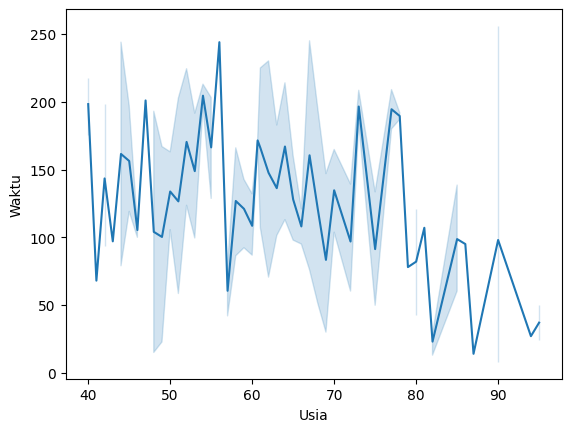

In [ ]:
# Visualisasi Line Plot Hubungan antara Usia dengan Waktu

sns.lineplot(x='Usia', y='Waktu', data=df)
plt.show()


Dapat disimpulkan bahwa tidak terdapat korelasi yang sebanding atau pola khusus antara usia dan waktu.

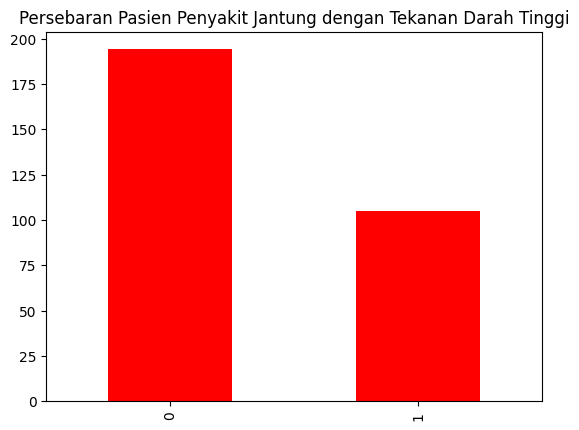

In [ ]:
# Melihat persebaran data pada atribut TekananDarahTinggi

df['TekananDarahTinggi'].value_counts().plot.bar(color='red')
plt.title('Persebaran Pasien Penyakit Jantung dengan Tekanan Darah Tinggi')
plt.show()


Hanya terdapat sedikit lebih dari 100 orang pasien Penyakit Jantung dengan Tekanan Darah Tinggi, sementara jumlah mereka yang tidak memiliki Penyakit Jantung dengan Tekanan Darah Tinggi lebih banyak.

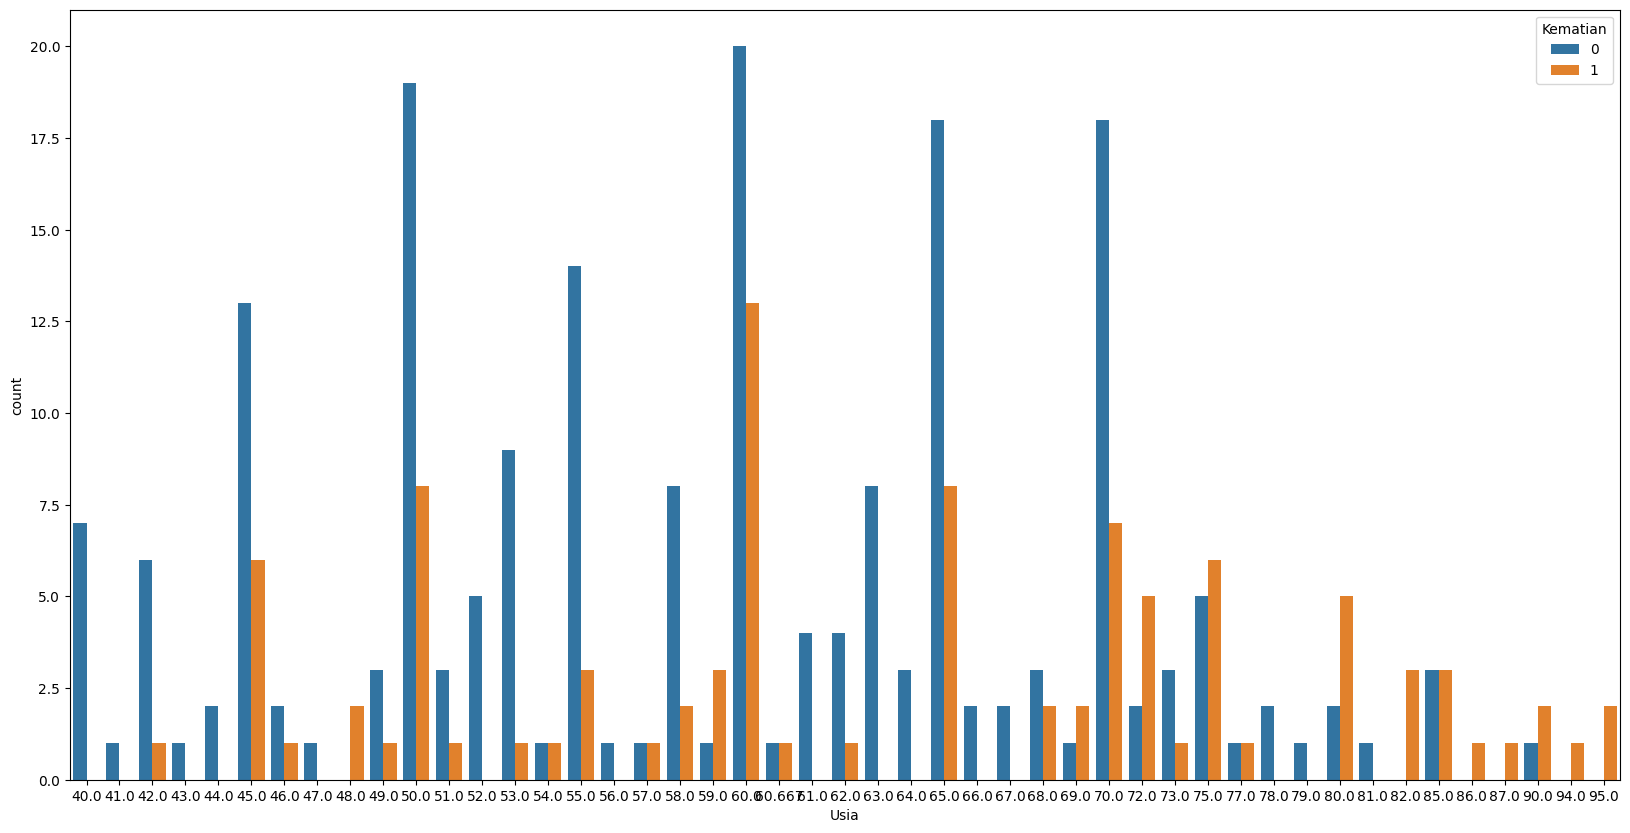

In [ ]:
# Mengamati distribusi jumlah kematian pasien berdasarkan usia dan jenis kelamin.

plt.figure(figsize=(20,10))
ax = sns.countplot(x="Usia", hue="Kematian", data=df)

Terlihat bahwa distribusi kematian paling tinggi terjadi pada usia 60 tahun, sementara distribusi kematian yang hampir setara terjadi pada usia 54 tahun, 57 tahun, 66 tahun, dan 77 tahun.

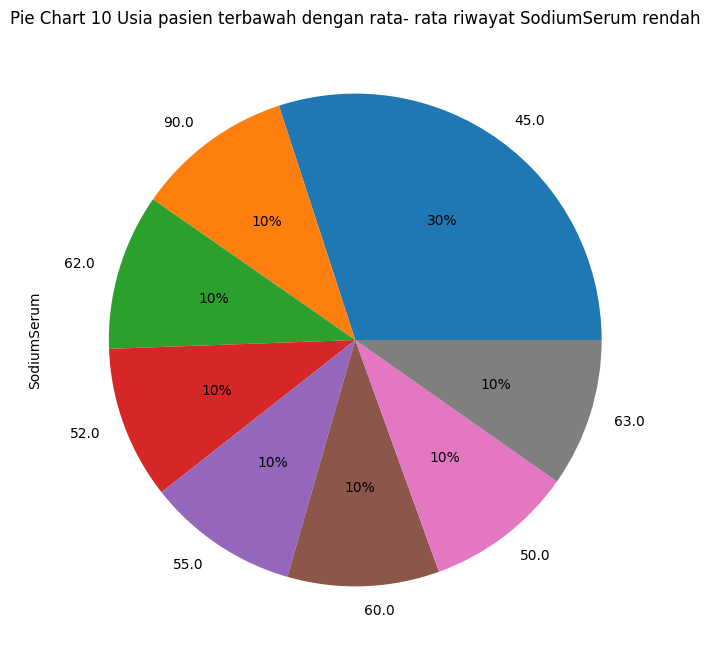

In [ ]:
# Visualisasi pie chart 10 Usia pasien terbawah dengan rata- rata riwayat SodiumSerum rendah

df_last10 = df.tail(10)
df_area = df_last10.groupby(['Usia']).sum()['SodiumSerum'].sort_values(ascending=False)
df_area.plot(kind='pie', figsize=(22,8), autopct='%1.0f%%')

plt.title("Pie Chart 10 Usia pasien terbawah dengan rata- rata riwayat SodiumSerum rendah")
plt.show()

Dari hasil visualisasi, dapat disimpulkan bahwa usia 63, 50, 60, 55, 52, 62, dan 90 tahun memiliki rerata tingkat rendah SodiumSerum sebesar 10%, diikuti oleh usia 45 tahun dengan rerata tingkat SodiumSerum sebesar 30%.

Text(0.5, 1.0, 'Tekanan Darah Tinggi vs Pecahan Ejeksi')

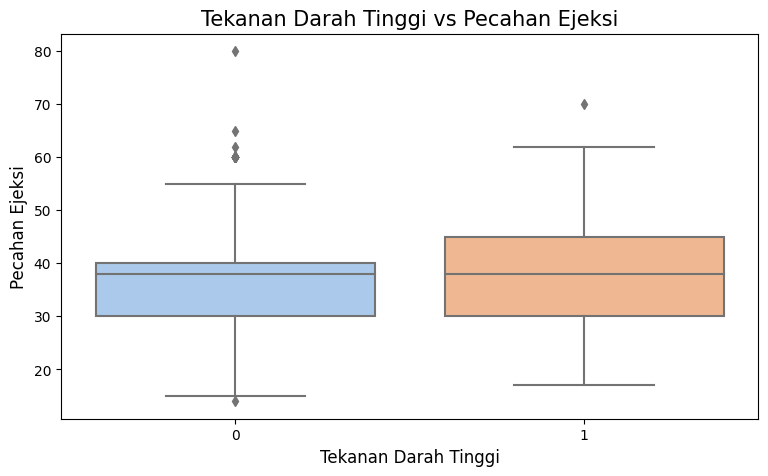

In [ ]:
# Visualisasi boxplot perbandingan Tekanan Darah Tinggi berdasarkan Pecahan Ejeksi

fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='TekananDarahTinggi', y='PecahanEjeksi', data=df, palette="pastel")

plt.xlabel("Tekanan Darah Tinggi", fontsize= 12)
plt.ylabel("Pecahan Ejeksi", fontsize= 12)
plt.title("Tekanan Darah Tinggi vs Pecahan Ejeksi", fontsize= 15)

Dalam diagram Boxplot, terlihat bahwa kelompok yang tidak memiliki riwayat tekanan darah tinggi (0) memiliki jangkauan yang lebih besar dibandingkan dengan kelompok yang memiliki riwayat tekanan darah tinggi (1). Selain itu, kelompok 0 juga memiliki lebih banyak outlier dibandingkan dengan kelompok 1.

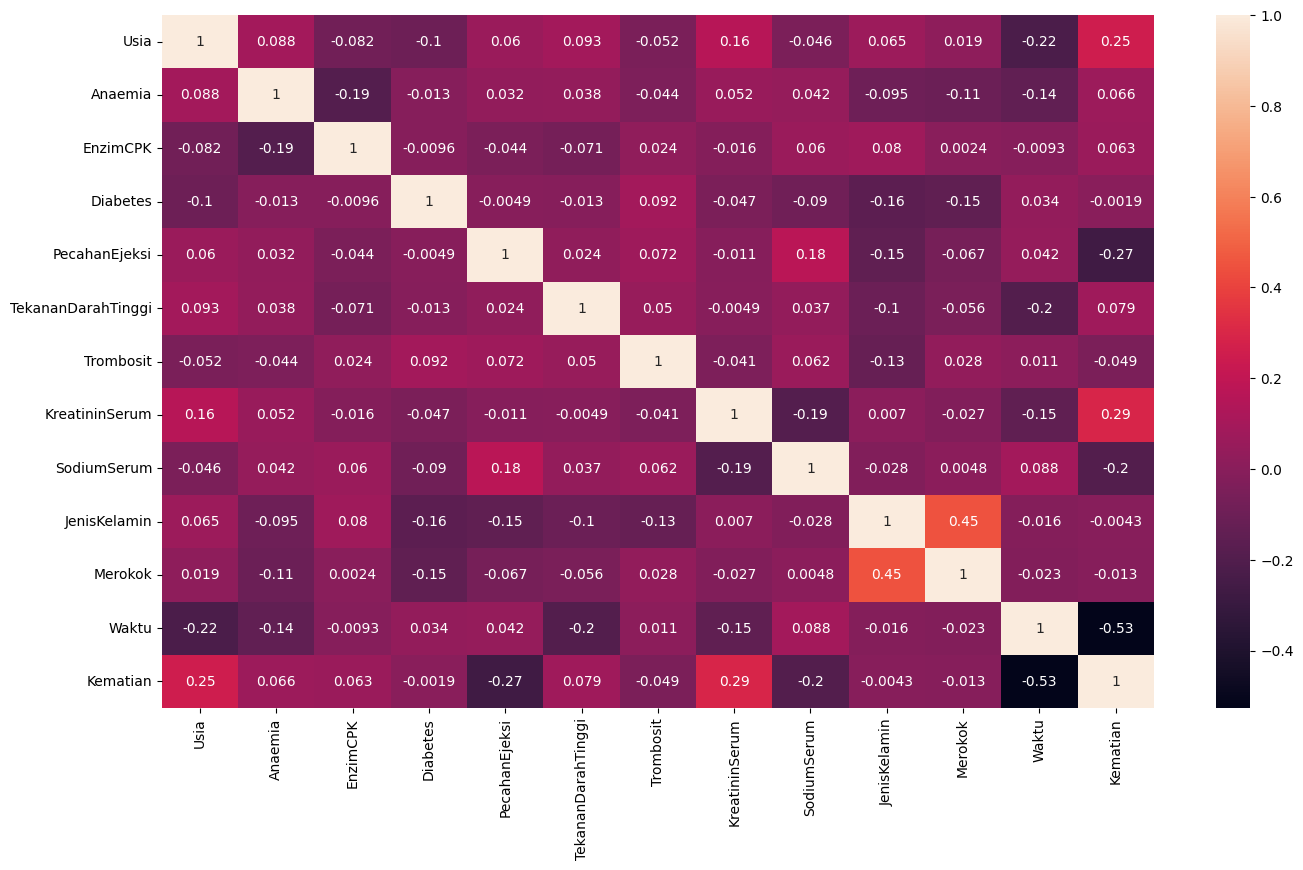

In [ ]:
# Visualisasi korelasi antar variabel untuk melihat hubungan

plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

Dari heatmap yang telah diperlihatkan, dapat disimpulkan bahwa:
- Terdapat korelasi tinggi sebesar 0.45 antara variabel `Merokok` dan `JenisKelamin`.
- Variabel `Waktu` memiliki korelasi rendah sebesar -0.53 dengan variabel `Kematian`.
- Variabel `KreatininSerum` menunjukkan korelasi tinggi sebesar 0.29 dengan variabel `Kematian`.
- Terdapat korelasi tinggi sebesar 0.25 antara variabel `Usia` dan `Kematian`.

# Data Preprocessing

In [ ]:
# Melakukan inisialisasi variabel X dan y

X = df.drop(['Kematian'], axis=1)
y = df['Kematian']

print(X.shape)
print(y.shape)


(299, 12)
(299,)



Pada tahap inisialisasi ini, kami mendefinisikan variabel X dengan merujuk pada kolom-kolom selain dari Kematian, sementara variabel y diatur sebagai kolom Kematian.

In [ ]:
# Melakukan feature selection menggunakan library F regression dengan k=12

topFeatures = SelectKBest(f_regression, k=12)
fit = topFeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Features', 'Score']

print("Top 12 Features yang Berpengaruh")
print(featureScores.nlargest(12, 'Score'))

Top 12 Features yang Berpengaruh
              Features       Score
11               Waktu  114.181264
7       KreatininSerum   28.158492
4        PecahanEjeksi   23.094063
0                 Usia   20.435946
8          SodiumSerum   11.765331
5   TekananDarahTinggi    1.881937
1              Anaemia    1.310096
2             EnzimCPK    1.173259
6            Trombosit    0.718880
10             Merokok    0.047333
9         JenisKelamin    0.005534
3             Diabetes    0.001121


Dengan menerapkan analisis F-regression menggunakan library, juga teridentifikasi bahwa 12 fitur yang memiliki pengaruh paling signifikan dalam model, yaitu `Waktu`, `KreatininSerum`, `PecahanEjeksi`, `Usia`, `SodiumSerum`, `TekananDarahTinggi`, `Anaemia`, `EnzimCPK`, `Trombosit`, `Merokok`, `JenisKelamin`, dan `Diabetes`.

In [ ]:
# Menyimpan hasil seleksi fitur ke dalam variabel X_fit untuk digunakan dalam langkah pemodelan berikutnya.

X_fit = df[['Waktu', 'KreatininSerum', 'PecahanEjeksi', 'Usia', 'SodiumSerum', 'TekananDarahTinggi', 'Anaemia', 'EnzimCPK',
            'Trombosit', 'Merokok', 'JenisKelamin', 'Diabetes']]

In [ ]:
# Menampilkan 5 baris pertama dataframe X_fit

X_fit.head()

,Waktu,KreatininSerum,PecahanEjeksi,Usia,SodiumSerum,TekananDarahTinggi,Anaemia,EnzimCPK,Trombosit,Merokok,JenisKelamin,Diabetes
0,4,1.9,20,75.0,130,1,0,582,265000.00,0,1,0
1,6,1.1,38,55.0,136,0,0,7861,263358.03,0,1,0
2,7,1.3,20,65.0,129,0,0,146,162000.00,1,1,0
3,7,1.9,20,50.0,137,0,1,111,210000.00,0,1,0
4,8,2.7,20,65.0,116,0,1,160,327000.00,0,0,1


In [ ]:
# Menampilkan informasi (kolom, baris, tipe data) dan dimensi pada dataframe X_fit

X_fit.info()
X_fit.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Waktu               299 non-null    int64  
 1   KreatininSerum      299 non-null    float64
 2   PecahanEjeksi       299 non-null    int64  
 3   Usia                299 non-null    float64
 4   SodiumSerum         299 non-null    int64  
 5   TekananDarahTinggi  299 non-null    int64  
 6   Anaemia             299 non-null    int64  
 7   EnzimCPK            299 non-null    int64  
 8   Trombosit           299 non-null    float64
 9   Merokok             299 non-null    int64  
 10  JenisKelamin        299 non-null    int64  
 11  Diabetes            299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


(299, 12)

In [ ]:
# Menyusun data menjadi bagian Pelatihan dan Pengujian pada kolom atau atribut yang telah dikumpulkan. Proporsi data Pelatihan ditetapkan sebesar 80% (0.80), sedangkan data Pengujian sebesar 20% (0.20).

X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.20, random_state=13)

print(X_train.shape)
print(X_test.shape)

(239, 12)
(60, 12)


Dengan memperhatikan pembagian proporsi data latih dan data uji, ditemukan bahwa jumlah data latih dari keseluruhan dataset adalah 239, sementara jumlah data uji adalah 60.

# Pendefinisian Model

Untuk mendefinisikan model sampai kompilasi, bagian ini berisi cell untuk memberikan penjelasan, seperti mengapa memilih arsitektur atau jenis model tertentu, mengapa memilih nilai hyperparameter, dan topik lainnya.

Dalam hal ini, kami menggunakan model Random Forest Regressor dan Classifier, yang merupakan metode kelompok untuk menciptakan pohon keputusan yang dibuat pada dataset yang dipisahkan secara acak. Metode ini didasarkan pada pendekatan divide-and-conquer. Karena tipe data prediksi yang digunakan adalah data kategorik, metode ini dianggap cocok untuk digunakan.

In [ ]:
# Model klasifikasi hutan random yang menggunakan GAUSSIAN CLASSIFIER n estimator 100

clf = RandomForestClassifier(n_estimators=100)

n_estimators adalah sebutan untuk jumlah pohon dalam hutan Random Forest. Jadi, semakin besar nilai n_estimators, semakin banyak pohon keputusan yang digunakan dalam metode ini.

In [ ]:
# Model random forest Regressor dengan GAUSSIAN CLASSIFIER n estimator 100

clf1 = RandomForestRegressor(n_estimators=100)

#  Pelatihan Model

In [ ]:
# Model Random Forest Classifier

RFC = clf.fit(X_train, y_train)
RFC

RandomForestClassifier()

In [ ]:
# Model Random Forest Regressor

RFR = clf1.fit(X_train, y_train)
RFR

RandomForestRegressor()

# Evaluasi Model

# a.Model Logistic Regression

In [ ]:
# Memeriksa performa dengan .prdict_proba() yang mengembalikan matriks probabilitas bahwa keluaran yang diprediksi sama dengan nol / satu

RFC.predict_proba(X_test)


array([[0.94, 0.06],
       [0.97, 0.03],
       [0.91, 0.09],
       [0.71, 0.29],
       [0.06, 0.94],
       [0.45, 0.55],
       [0.48, 0.52],
       [0.38, 0.62],
       [0.26, 0.74],
       [1.  , 0.  ],
       [0.65, 0.35],
       [0.83, 0.17],
       [0.36, 0.64],
       [0.36, 0.64],
       [0.31, 0.69],
       [0.9 , 0.1 ],
       [0.92, 0.08],
       [0.97, 0.03],
       [0.92, 0.08],
       [0.8 , 0.2 ],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.89, 0.11],
       [0.12, 0.88],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.88, 0.12],
       [0.44, 0.56],
       [0.96, 0.04],
       [0.78, 0.22],
       [0.23, 0.77],
       [0.65, 0.35],
       [0.98, 0.02],
       [0.92, 0.08],
       [0.63, 0.37],
       [0.24, 0.76],
       [0.88, 0.12],
       [0.55, 0.45],
       [0.67, 0.33],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.6 , 0.4 ],
       [0.98, 0.02],
       [0.97, 0.03],
       [0.2 , 0.8 ],
       [0.95, 0.05],
       [0.48,

In [ ]:
# Melihat predicted outputs dengan .predict()

y_pred = RFC.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
# Melihat nilai akurasi dengan .score

print("Test score:", RFC.score(X_test, y_test))
print("Train score:", RFC.score(X_train, y_train))

Test score: 0.9166666666666666
Train score: 1.0


Test score: 0.9166666666666666: Ini menunjukkan bahwa model memiliki akurasi sekitar 91.67% pada data uji. Artinya, dari total data uji, sekitar 91.67% di klasifikasikan dengan benar oleh model.

Train score: 1.0: Skor pelatihan sebesar 1.0 menunjukkan bahwa model mencapai akurasi sempurna (100%) pada data pelatihan. Ini bisa mengindikasikan adanya potensi overfitting, di mana model mungkin terlalu "mengingat" data pelatihan dan kurang dapat umum pada data baru.



In [ ]:
# Melihat confussion matrix dan classification report dari model

confusion_matrix(y_test, y_pred)

array([[40,  2],
       [ 3, 15]])

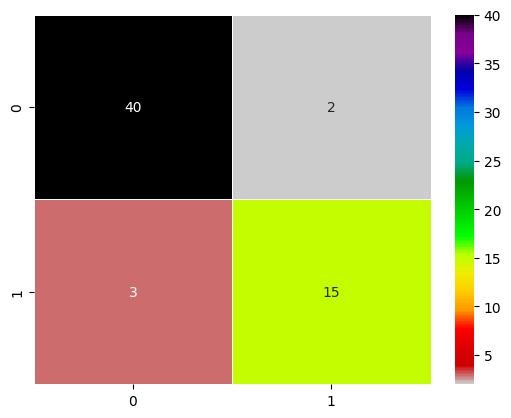

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.88      0.83      0.86        18

    accuracy                           0.92        60
   macro avg       0.91      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = 'nipy_spectral_r')
plt.show()
print(classification_report(y_test, y_pred))

Berdasarkan matriks konfusi, terungkap bahwa terdapat 40 nilai True Positive (TP), 2 nilai False Positive (FP), 3 nilai False Negative (FN), dan 15 nilai True Negative (TN).

In [ ]:
# Melihat summary dari evaluasi model Logistic Regression

print('Ringkasan Evaluasi Model Random Forest Classifier')
print('Akurasi :', accuracy_score(y_test, y_pred))
print('Presisi :', precision_score(y_test,y_pred))
print('Recall :', recall_score(y_test,y_pred))
print('F1 Score :', f1_score(y_test,y_pred))


Ringkasan Evaluasi Model Random Forest Classifier
Akurasi : 0.9166666666666666
Presisi : 0.8823529411764706
Recall : 0.8333333333333334
F1 Score : 0.8571428571428571


Berdasarkan evaluasi model, diketahui bahwa akurasi dari model random forest classifier mencapai 92% (0.916). Hal ini menunjukkan bahwa hasilnya cukup baik dan dapat dianggap akurat. Oleh karena itu, model ini dapat digunakan untuk melakukan prediksi terkait keselamatan pasien dari penyakit jantung.

# b. Model Random Forest Regressor

In [ ]:
# Melihat predicted outputs dengan .predict()

y_pred_reg = RFR.predict(X_test)
y_pred_reg


array([0.01, 0.  , 0.03, 0.28, 1.  , 0.55, 0.42, 0.78, 0.87, 0.  , 0.54,
       0.14, 0.78, 0.76, 0.71, 0.03, 0.14, 0.  , 0.04, 0.1 , 0.09, 0.  ,
       0.02, 0.91, 0.  , 0.03, 0.03, 0.63, 0.  , 0.03, 0.93, 0.27, 0.  ,
       0.09, 0.25, 0.84, 0.06, 0.55, 0.42, 0.  , 0.  , 0.  , 0.57, 0.01,
       0.  , 0.95, 0.  , 0.63, 0.02, 0.05, 0.56, 0.  , 0.02, 0.04, 0.18,
       0.71, 0.01, 0.69, 0.1 , 0.71])

In [ ]:
# Melihat nilai akurasi dengan .score

print("Test score:", RFR.score(X_test, y_test))
print("Train score:", RFR.score(X_train, y_train))

Test score: 0.5476666666666665
Train score: 0.9093273053033922


Diperoleh skor uji sebesar 54% (0.54), sedangkan jika dibandingkan dengan skor pelatihan yang mencapai 92% (0.915).

In [ ]:
# Melihat confussion matrix dan classification report dari model

y_pred_reg_round = y_pred_reg.round()
confusion_matrix(y_test, y_pred_reg_round)

array([[36,  6],
       [ 4, 14]])

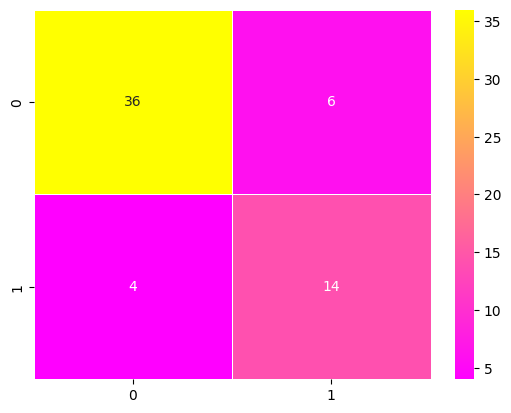

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        42
           1       0.70      0.78      0.74        18

    accuracy                           0.83        60
   macro avg       0.80      0.82      0.81        60
weighted avg       0.84      0.83      0.84        60



In [ ]:
cm_reg = confusion_matrix(y_test, y_pred_reg_round)
sns.heatmap(cm_reg, annot=True, fmt="d", linewidths=.5, cmap = 'spring')
plt.show()
print(classification_report(y_test, y_pred_reg_round))

Berdasarkan matriks konfusi, terdapat 38 nilai True Positive (TP), 4 nilai False Positive (FP), 3 nilai False Negative (FN), dan 15 nilai True Negative (TN).

In [ ]:
# Melihat summary dari evaluasi model Logistic Regression

print('Ringkasan Evaluasi Model Random Forest Regressor')
print('Akurasi :', accuracy_score(y_test, y_pred_reg_round))
print('Presisi :', precision_score(y_test,y_pred_reg_round))
print('Recall :', recall_score(y_test,y_pred_reg_round))
print('F1 Score :', f1_score(y_test,y_pred_reg_round))

Ringkasan Evaluasi Model Random Forest Regressor
Akurasi : 0.8333333333333334
Presisi : 0.7
Recall : 0.7777777777777778
F1 Score : 0.7368421052631577


Dari evaluasi model, terungkap bahwa akurasi dari model random forest regressor mencapai 88% (0.88). Hal ini menunjukkan bahwa hasilnya cukup baik dan dapat dianggap akurat. Oleh karena itu, model ini dapat digunakan untuk melakukan prediksi terkait keselamatan pasien dari penyakit jantung.

**Kesimpulan**

Akurasi hasil dari penggunaan dua metode ensemble, yaitu Random Forest Classifier dengan akurasi 92% dan Random Forest Regressor dengan akurasi 88%, keduanya tergolong baik dan dapat digunakan untuk memprediksi keselamatan pasien dari penyakit jantung. Oleh karena itu, pada langkah selanjutnya, kami akan menggunakan kedua model tersebut, dan output prediksi akan mencakup hasil dari kedua model.

# Model Inference

Petunjuk Pengisian:

- Harap masukkan nilai Usia (float) dalam rentang 40 tahun hingga 95 tahun dengan format tahun.bulan.
- Untuk kolom Trombosit dan Kreatinin Serum, masukkan nilai sesuai dengan data yang akan diprediksi, dengan tipe data float.

In [ ]:
print('--- PREDIKSI KESELAMATAN PASIEN DARI PENYAKIT JANTUNG MENGGUNAKAN RANDOM FOREST ---')
print('='*100)

usia = float(input("Usia (Range 40.0 - 95.0) (format: tahun.bulan) : "))
anaemia = input("Apakah pasien mempunyai anemia? (Yes/No): : ")
enzim = int(input("Level Creatinine Phosphokinase : "))
diabetes = input("Apakah pasien mempunyai riwayat diabetes? (Yes/No) : ")
ejeksi = int(input("Banyak Darah Keluar Jantung (Pecahan Ejeksi) : "))
DarahTinggi = input("Apakah pasien mempunyai darah tinggi? (Yes/No): : ")
trombosit = float(input("Jumlah platelet (trombosit) pasien : "))
kreatinin = float(input("Level serum creatinine dalam darah : "))
sodium = int(input("Level serum sodium dalam darah : "))
JenisKelamin= input("Jenis Kelamin (Male/Female): ")
rokok = input("Apakah pasien merokok? (Yes/No) : ")
waktu = int(input("Hari sebelum follow-up berikutnya: : "))

val = [usia, enzim , ejeksi, trombosit, kreatinin, sodium, waktu]

anae = {'No':0, 'Yes': 1}

for i in range(0,2):
    if anae[anaemia]==i:
        val.append(1.0)
    else:
        next

diabet = {'No':0, 'Yes': 1}

for i in range(0,2):
    if diabet[diabetes]==i:
        val.append(1.0)
    else:
        next

darah = {'No':0, 'Yes': 1}

for i in range(0,2):
    if darah[DarahTinggi]==i:
        val.append(1.0)
    else:
        next

kelamin = {'Female':0, 'Male': 1}

for i in range(0,2):
    if kelamin[JenisKelamin]==i:
        val.append(1.0)
    else:
        next

smoke = {'No':0, 'Yes': 1}

for i in range(0,2):
    if smoke[rokok]==i:
        val.append(1.0)
    else:
        next

print(val)

predict_rfc = RFC.predict([val])
predict_reg = RFR.predict([val])

if (predict_rfc == 0):
    print("Berdasarkan prediksi Random Forest Classifier yaitu pasien belum meninggal sebelum follow up berikutnya")
else:
    print("Berdasarkan prediksi Random Forest Classifier pasien telah meninggal sebelum follow up berikutnya.")

if (predict_reg == 0):
    print("Berdasarkan prediksi Random Forest Regressor yaitu pasien belum meninggal sebelum follow up berikutnya")
else:
    print("Berdasarkan prediksi Random Forest Regressor yaitu pasien telah meninggal sebelum follow up berikutnya.")

--- PREDIKSI KESELAMATAN PASIEN DARI PENYAKIT JANTUNG MENGGUNAKAN RANDOM FOREST ---
Usia (Range 40.0 - 95.0) (format: tahun.bulan) : 60.0
Apakah pasien mempunyai anemia? (Yes/No): : Yes
Level Creatinine Phosphokinase : 1
Apakah pasien mempunyai riwayat diabetes? (Yes/No) : Yes
Banyak Darah Keluar Jantung (Pecahan Ejeksi) : 1
Apakah pasien mempunyai darah tinggi? (Yes/No): : Yes
Jumlah platelet (trombosit) pasien : 2
Level serum creatinine dalam darah : 1
Level serum sodium dalam darah : 2
Jenis Kelamin (Male/Female): Female
Apakah pasien merokok? (Yes/No) : Yes
Hari sebelum follow-up berikutnya: : 2
[60.0, 1, 1, 2.0, 1.0, 2, 2, 1.0, 1.0, 1.0, 1.0, 1.0]
Berdasarkan prediksi Random Forest Classifier pasien telah meninggal sebelum follow up berikutnya.
Berdasarkan prediksi Random Forest Regressor yaitu pasien telah meninggal sebelum follow up berikutnya.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


- Berdasarkan Random Forest Classifier, pasien diprediksi meninggal sebelum follow-up berikutnya.

- Berdasarkan Random Forest Regressor, pasien juga diprediksi meninggal sebelum follow-up berikutnya.

# 11. Pengambilan Keputusan
Dari analisis yang telah kami lakukan, diperoleh kesimpulan sebagai berikut:
- Pada Dataset terdapat 13 atribut yang diperkirakan sebagai faktor yang memprediksi keselamatan pasien dari penyakit jantung, Namun setelah dilakukan analisis kami menyimpulkan bahwa semua atribut  menjadi faktor kuat yang memprediksi keselamatan pasien dari penyakit jantung dengan atribut `Kematian` sebagai target dan atribut `Waktu`, `KreatininSerum`, `PecahanEjeksi`, `Usia`, `SodiumSerum`, `TekananDarahTinggi`, `Anaemia `, `EnzimCPK`, `Trombosit`, `Merokok`, `JenisKelamin`, dan `Diabetes` sebagai faktor yang memprediksi keselamatan pasien dari penyakit jantung
- Pada datset ini tidak terdapat adanya misssing value pada setiap atributnya
- Pada analisis ini kami juga membuat beberapa visualisasi menggunakan lineplot, boxplot, histogram, pie chart, dan matriks korelasi (heatmap) dan juga kamimelakukan beberapa contoh groupby dan query terhadap data yang ada
- Pada analisis ini variabel dependen atau target yang digunakan yaitu `Kematian` dan variabel independen yang digunakan yaitu `Waktu`, `KreatininSerum`, `PecahanEjeksi`, `Usia`, `SodiumSerum`, `TekananDarahTinggi`, `Anaemia `, `EnzimCPK`, `Trombosit`, `Merokok`, `JenisKelamin`, dan `Diabetes`
- Pada proses feature selection kami menggunakan library F regression yang memberikan score pada setiap atribut
- Pada analisis ini kami membagi data menjadi Training dan Testing dengan proporsi Training data sebesar 80% (0.80) dan Testing data sebesar 20% (0.20)
- Pada project ini kami menggunakan model ensemble method yaitu Random Forest Classifier dan Random Forest Regressor
- Untuk model Random Forest Classifier didapatkan nilai Akurasi sebesar 92% (0.916), nilai Presisi sebesar 88% (0.88), nilai Recall sebesar 83% (0.83), dan nilai F1 Score sebesar 86% (0.857)
- Untuk model Random Forest Regressor didapatkan nilai Akurasi sebesar 88% (0.88), nilai Presisi sebesar 79% (0.789), nilai Recall sebesar 83% (0.83), dan nilai F1 Score sebesar 81% (0.81)
- Hasil akurasi dengan menggunakan 2 model ensemble method diantaranya Random Forest Classifier dengan nilai akurasi 92% dan Random Forest Regressor dengan nilai akurasi 88% sama-sama baik dan bisa digunakan untuk dilakukan prediksi keselamatan pasien dari penyakit jantung.
- Pada tahap selanjutnya kami akan menggunakan kedua model tersebut dan pada hasil prediksi akan diberikan output hasil prediksi dengan 2 model tersebut